In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
# Read CSV File

In [3]:
df = pd.read_csv("/home/pratik/Desktop/2ndSem/Smai-2/Datasets/Question-3/airfoil.csv",header=None)

In [4]:
# Analyze Data

In [5]:
df.head()

,0,1,2,3,4,5
0,8000.0,4.0,0.2286,39.6,0.004738,113.129
1,6300.0,0.0,0.0508,55.5,0.000762,132.796
2,400.0,4.0,0.2286,55.5,0.004286,123.274
3,1250.0,15.4,0.0508,39.6,0.028259,126.743
4,800.0,7.3,0.2286,39.6,0.012348,126.299


In [6]:
# Compare Classes correlation with Label Class

In [7]:
df.corr()

,0,1,2,3,4,5
0,1.000000,-0.262858,-0.006258,0.121549,-0.219393,-0.415622
1,-0.262858,1.000000,-0.505495,0.061289,0.753177,-0.138754
2,-0.006258,-0.505495,1.000000,0.004854,-0.217233,-0.240482
3,0.121549,0.061289,0.004854,1.000000,0.004217,0.131766
4,-0.219393,0.753177,-0.217233,0.004217,1.000000,-0.302809
5,-0.415622,-0.138754,-0.240482,0.131766,-0.302809,1.000000


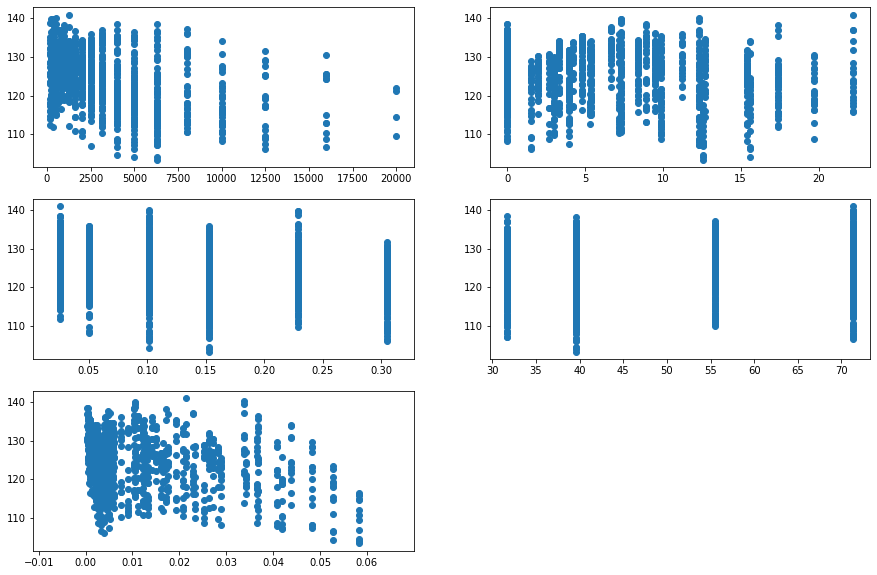

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(3,2,1)
X = df.iloc[:, 0]
Y = df.iloc[:, 5]
plt.scatter(X, Y)

plt.subplot(3,2,2)
X = df.iloc[:, 1]
Y = df.iloc[:, 5]
plt.scatter(X, Y)

plt.subplot(3,2,3)
X = df.iloc[:, 2]
Y = df.iloc[:, 5]
plt.scatter(X, Y)

plt.subplot(3,2,4)
X = df.iloc[:, 3]
Y = df.iloc[:, 5]
plt.scatter(X, Y)

plt.subplot(3,2,5)
X = df.iloc[:, 4]
Y = df.iloc[:, 5]
plt.scatter(X, Y)
plt.show()

In [9]:
# Normalize Data

In [10]:
df=(df-df.min())/(df.max()-df.min())

In [11]:
# Split Data (Training and Validation)

In [12]:
msk = np.random.rand(len(df)) < 0.4
temp_df = df[msk].copy()
training_df = df[~msk].copy()

mskk = np.random.rand(len(temp_df)) < 0.2
validation_df = temp_df[~mskk].copy()
test_df = temp_df[mskk].copy()

In [13]:
print(training_df.shape)
print(validation_df.shape)
print(test_df.shape)

(711, 6)
(399, 6)
(92, 6)


In [14]:
# Helper Function

In [15]:
mse=[]

def derivative(X,W,Y,learningrate):
    
    firstpara = np.matmul(X, W)
    result = np.subtract(firstpara , Y)
    result = np.transpose(result)
    final = np.matmul(result,X)
    final = np.transpose(final)
    final = final*learningrate
#     print(final.shape)
    return final

def cost(W,X,Y):
    firstpara = np.matmul(X,W)
    result = np.subtract(firstpara,Y)
    result = np.square(result)
    return (result.sum())/2

def iteration(k,learningrate):
    costt=[]
    W = np.array([[1,1,1,1,1,1]])
    W = np.transpose(W)

    X = np.array(training_df.iloc[:,:-1])
    A=np.ones((len(training_df),1))
    X = np.c_[A,X] 

    Y = np.array([training_df.iloc[:,5]])
    Y = np.transpose(Y)

    for i in range(0,k):
        final = derivative(X,W,Y,learningrate)
        W = np.subtract(W,final)
        costt.append(cost(W,X,Y))
#         print(costt[-1])

    X_val = np.array(validation_df.iloc[:,:-1])
    A=np.ones((len(validation_df),1))
    X_val = np.c_[A,X_val] 

    ypred = np.matmul(X_val,W)
    ytrue = np.array(validation_df.iloc[:,5])
    mse.append(mean_squared_error(ytrue, ypred))
    acc= r2_score(ytrue,ypred)
    return acc

In [16]:
# Training Data (Main Function)

In [17]:
acc0 = []
acc1 = []
acc2 = []
acc3 = []
acc4 = []
acc5 = []
acc6 = []
learning = [0.001,0.0001,0.00001,0.000001,0.0000001,0.0000001]
iterations = [1000,5000,10000,50000,100000,200000,350000]

print("------------0.001---------------")

for i in iterations:
    acc0.append(iteration(i,0.001))
    print(acc0[-1])

print("------------0.0001---------------")

for i in iterations:
    acc1.append(iteration(i,0.0001))
    print(acc1[-1])

print("------------0.00001---------------")

for i in iterations:
    acc2.append(iteration(i,0.00001))
    print(acc2[-1])

print("------------0.000001---------------")

for i in iterations:
    acc3.append(iteration(i,0.000001))
    print(acc3[-1])
    
print("-----------0.0000001----------------")

for i in iterations:
    acc4.append(iteration(i,0.0000001))
    print(acc4[-1])

print("-----------0.00000001----------------")

for i in iterations:
    acc5.append(iteration(i,0.00000001))
    print(acc5[-1])

------------0.001---------------
0.5178118949795243
0.5178364646734528
0.5178364646734528
0.5178364646734528
0.5178364646734528
0.5178364646734528
0.5178364646734528
------------0.0001---------------
0.3311277119016245
0.5166102158180506
0.5178112296216958
0.5178364646734492
0.5178364646734492
0.5178364646734492
0.5178364646734492
------------0.00001---------------
-2.476814105349666
-0.1895203165525532
0.33085752308999594
0.5166085940436447
0.5178111624497002
0.5178364530717549
0.5178364646733316
------------0.000001---------------
-17.298024585759723
-3.3529189320890476
-2.4770305091596443
-0.18959970948932936
0.33083049970847733
0.4931613787678115
0.5134981217470369
-----------0.0000001----------------
-98.04929053842024
-43.207541434481435
-17.31215606925504
-3.3529642010283585
-2.477052149337364
-1.4244614641619466
-0.6118932628601512
-----------0.00000001----------------
-118.62152347006138
-108.97117746784807
-98.05032360676113
-43.2096713040717
-17.313569036567156
-5.5911629508

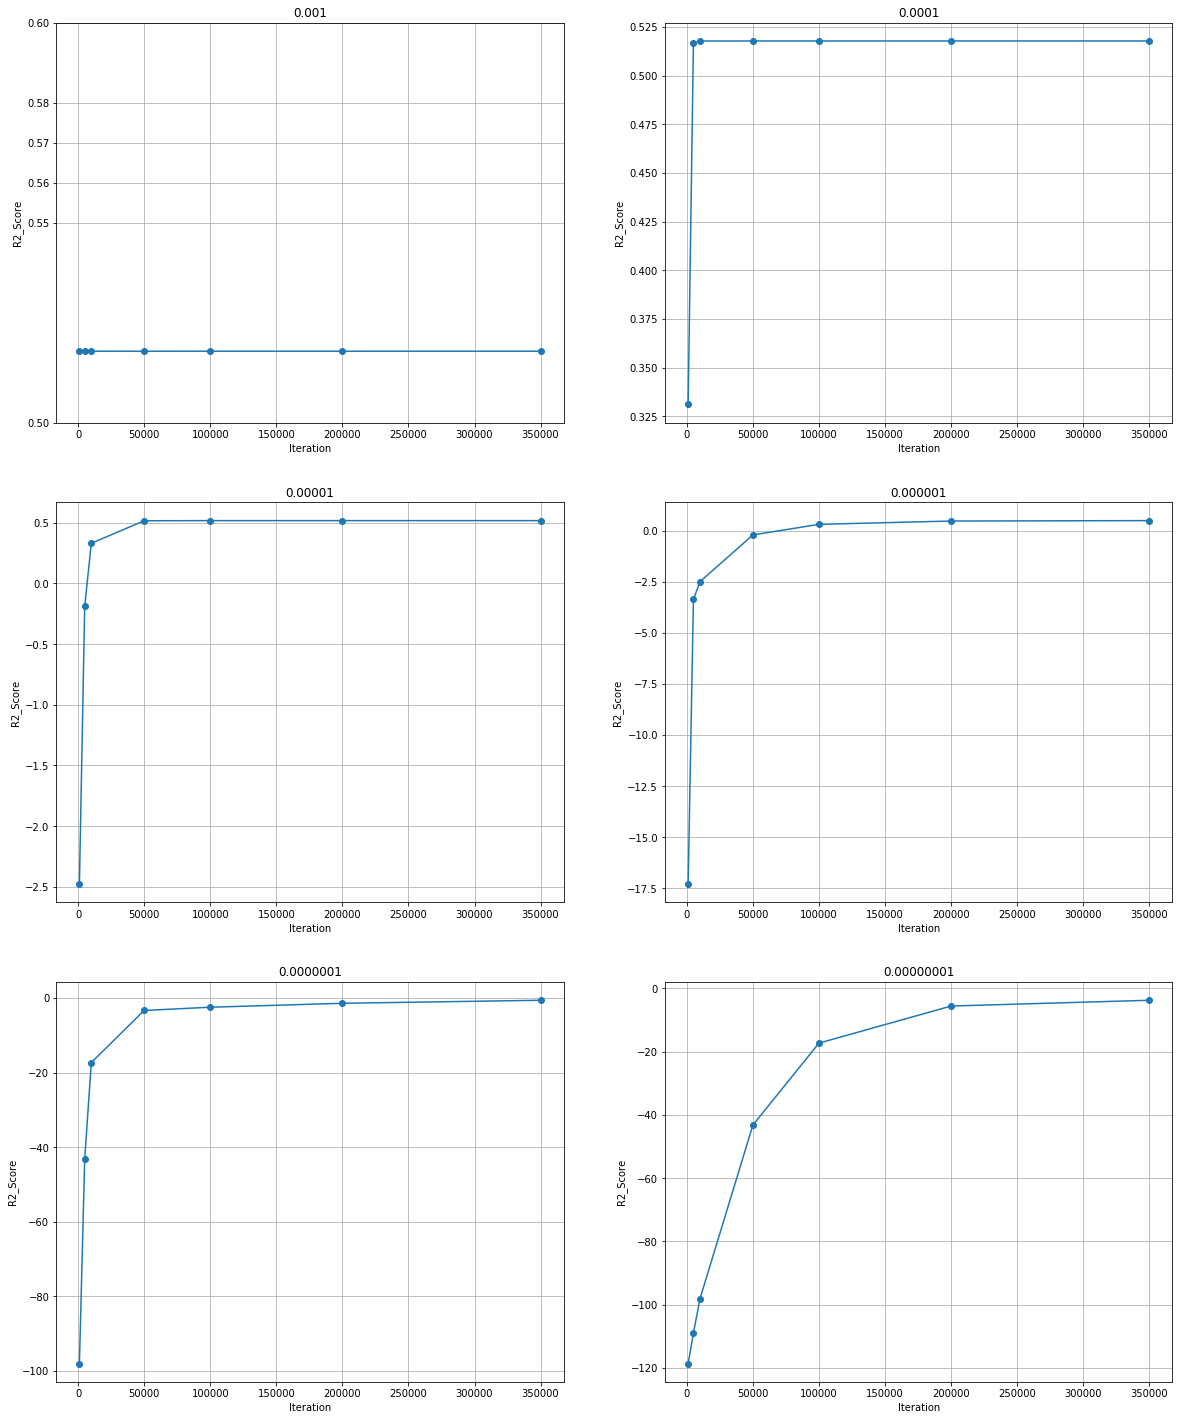

In [18]:
plt.figure(figsize=(20,25))
plt.subplot(3,2,1)
plt.grid(True)
plt.plot(iterations,acc0,marker='o')
plt.yticks([0.50,0.55,0.56,0.57,0.58,0.6])
plt.title("0.001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('R2_Score')
plt.subplot(3,2,2)
plt.grid(True)
plt.plot(iterations,acc1,marker='o')
plt.title("0.0001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('R2_Score')
plt.subplot(3,2,3)
plt.grid(True)
plt.plot(iterations,acc2,marker='o')
plt.title("0.00001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('R2_Score')
plt.subplot(3,2,4)
plt.grid(True)
plt.plot(iterations,acc3,marker='o')
plt.title("0.000001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('R2_Score')
plt.subplot(3,2,5)
plt.grid(True)
plt.plot(iterations,acc4,marker='o')
plt.title("0.0000001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('R2_Score')
plt.subplot(3,2,6)
plt.grid(True)
plt.plot(iterations,acc5,marker='o')
plt.title("0.00000001", fontdict=None, loc='center')
plt.xlabel('Iteration')
plt.ylabel('R2_Score')
plt.show()

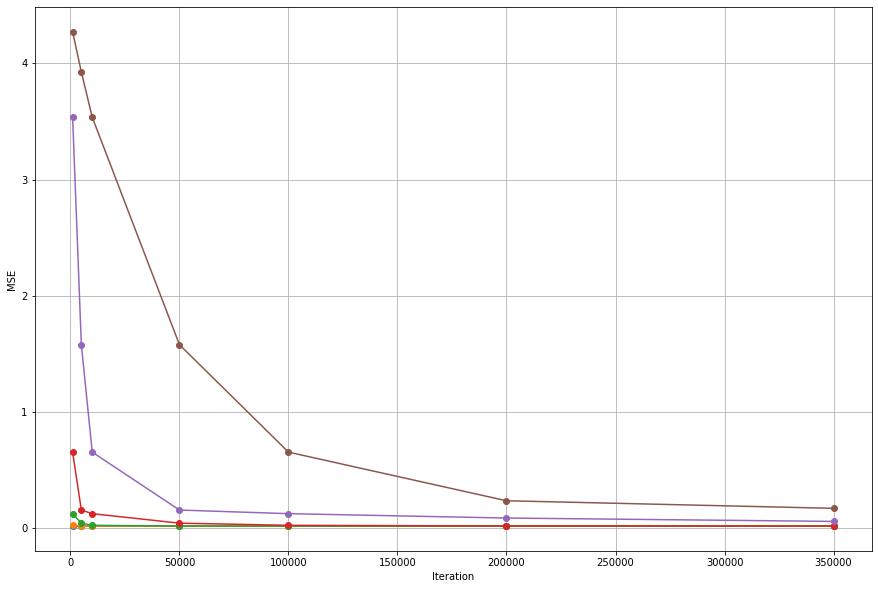

In [19]:
mse1 = mse[:7]
mse2 = mse[7:14]
mse3 = mse[14:21]
mse4 = mse[21:28]
mse5 = mse[28:35]
mse6 = mse[35:]

plt.figure(figsize=(15,10))
#plt.subplot(3,2,1)
plt.grid(True)
plt.plot(iterations,mse1,marker='o')
plt.xlabel('Iteration')
plt.ylabel('MSE')
#plt.subplot(3,2,1)
plt.grid(True)
plt.plot(iterations,mse2,marker='o')
plt.xlabel('Iteration')
plt.ylabel('MSE')
#plt.subplot(3,2,1)
plt.grid(True)
plt.plot(iterations,mse3,marker='o')
plt.xlabel('Iteration')
plt.ylabel('MSE')
#plt.subplot(3,2,1)
plt.grid(True)
plt.plot(iterations,mse4,marker='o')
plt.xlabel('Iteration')
plt.ylabel('MSE')
#plt.subplot(3,2,1)
plt.grid(True)
plt.plot(iterations,mse5,marker='o')
plt.xlabel('Iteration')
plt.ylabel('MSE')
#plt.subplot(3,2,1)
plt.grid(True)
plt.plot(iterations,mse6,marker='o')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()

In [20]:
def parameter(W,k,learningrate):
    costt=[]
    W = np.transpose(W)

    X = np.array(training_df.iloc[:,:-1])
    A=np.ones((len(training_df),1))
    X = np.c_[A,X] 

    Y = np.array([training_df.iloc[:,5]])
    Y = np.transpose(Y)

    for i in range(0,k):
        final = derivative(X,W,Y,learningrate)
        W = np.subtract(W,final)
        costt.append(cost(W,X,Y))
#         print(costt[-1])
    return costt

In [21]:
W1  = np.array([[5,8,19,11,1,6]])
W2  = np.array([[6,2,11,18,1,9]])
W3  = np.array([[7,7,7,7,7,7]])

cost_w1  = parameter(W1,2000,0.00001)
cost_w2  = parameter(W2,2000,0.00001)
cost_w3  = parameter(W3,2000,0.00001)

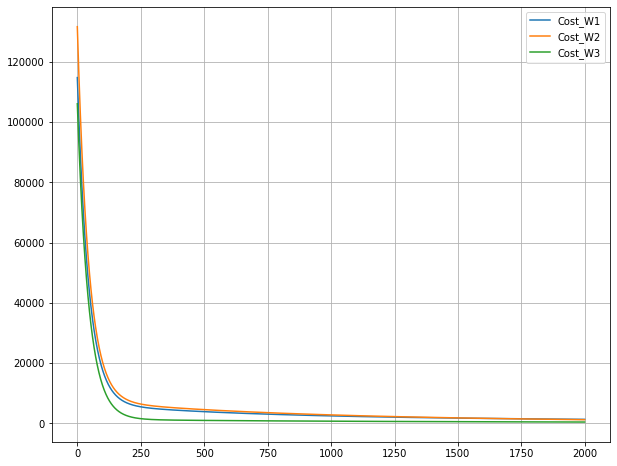

In [22]:
# t3 = np.arange(0,10000,100)
plt.figure(figsize=(10,8))
plt.grid(True)
t=np.arange(len(cost_w1))
t1=np.arange(len(cost_w2))
t2=np.arange(len(cost_w3))
plt.plot(t,cost_w1,label="Cost_W1")
plt.plot(t1,cost_w2,label="Cost_W2")
plt.plot(t2,cost_w3,label="Cost_W3")

# plt.xticks(t3)
plt.legend()
plt.show()

In [23]:
#Test Data Result

In [24]:
def test_iteration(k,learningrate):
    W = np.array([[1,1,1,1,1,1]])
    W = np.transpose(W)

    X = np.array(training_df.iloc[:,:-1])
    A=np.ones((len(training_df),1))
    X = np.c_[A,X] 

    Y = np.array([training_df.iloc[:,5]])
    Y = np.transpose(Y)

    for i in range(0,k):
        final = derivative(X,W,Y,learningrate)
        W = np.subtract(W,final)
        
    X_val = np.array(test_df.iloc[:,:-1])
    A=np.ones((len(test_df),1))
    X_val = np.c_[A,X_val] 

    ypred = np.matmul(X_val,W)
    ytrue = np.array(test_df.iloc[:,5])
    acc= r2_score(ytrue,ypred)
    mean_squared_error(ytrue, ypred)
    return acc

print(test_iteration(100000,0.001))

0.5244960676414053


# When 0-0.5% of values are missing of that feature

In [3]:
#Missing values can be replaced by Mean/Mode/Median of data as per its type
#As the percentage of missing value is not high it can be predicted based onabove values.

# When 8-10% of values are missing of that feature

In [4]:
#Missing values can be replaced by Mean/Mode/Median of data as per its type
#As the percentage of missing value is not high it can be predicted based onabove values.

# When 60-70% of values are missing of that feature

In [5]:
#Missing value percentage is too high to predict,dropping the feaature will be the best possible way